# Юнит 3, проект 3, Проект 3. О вкусной и здоровой пище

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

%matplotlib inline

In [2]:
import os
import math
from datetime import datetime

In [3]:
import string
import collections

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import sys

In [5]:
from sklearn.model_selection import train_test_split  # Загружаем специальный инструмент для разбивки: 
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели

In [30]:
#np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', sys.maxsize)
pd.set_option('display.max_rows', 5)#sys.maxsize)

In [31]:
# разные вариаты для удобства отладки, включаю разные
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [6]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

### Колонки

* Restaurant_id — идентификационный номер ресторана / сети ресторанов;
* City — город, в котором находится ресторан;
* Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
* Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* Price Range — диапазон цен в ресторане;
* Number of Reviews — количество отзывов о ресторане;
* Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
* URL_TA — URL страницы ресторана на TripAdvisor;
* ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [7]:
model = RandomForestRegressor()

In [58]:
DATA_DIR = ''#'C:/skillfactory/git_sf_repo/skcourse_projects/module_3/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')
print(len(df_train), len(df_test))
#df_train.sample(5)
#df_test.sample(5)

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

40000 10000


In [9]:
def data_reload():
    global df_train
    global df_test
    global df
    DATA_DIR = 'C:/skillfactory/git_sf_repo/skcourse_projects/module_3/'
    df_train = pd.read_csv(DATA_DIR+'main_task.csv')
    df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
    
    df_train['sample'] = 1 # помечаем где у нас трейн
    df_test['sample'] = 0 # помечаем где у нас тест
    df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

    df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [10]:
def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [11]:
def test_model(lst_del, score_var, df_var, pc=0.25):
    global model
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    X = df_var.drop(lst_del, axis = 1)
    y = df_var[score_var]
    
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc, random_state=RANDOM_SEED)
    
    # Создаём модель
    # regr = RandomForestRegressor(n_estimators=100)
    # model
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

    # Обучаем модель на тестовом наборе данных
    model.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = model.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    mean_err = metrics.mean_absolute_error(y_test, y_pred)
    print('MAE:', mean_err)
    return mean_err

In [12]:
def test_model_local(lst_del, score_var, df_var, pc=0.25):
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    X = df_var.drop(lst_del, axis = 1)
    y = df_var[score_var]
    
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc, random_state=RANDOM_SEED)
    
    # Создаём модель
    # regr = RandomForestRegressor(n_estimators=100)
    # model
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

    # Обучаем модель на тестовом наборе данных
    model.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = model.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    mean_err = metrics.mean_absolute_error(y_test, y_pred)
    print('MAE:', mean_err)
    return mean_err

In [13]:
def save_model(model_in, test_data_in, save_v):
    predict_submission = model_in.predict(test_data_in)
    sample_submission['Rating'] = predict_submission
    if (save_v==1):
        sample_submission.to_csv('submission.csv', index=False)
    sample_submission.head(10)

In [14]:
# функция распечатки значений матрицы корреляций выше заданного
def print_corr_over_threshold(correlation_in, threshold_in):
    np.fill_diagonal(correlation_in.values, -2)
    for i, ii in zip(correlation_in.columns, enumerate(correlation_in.columns)):
        for j, jj in zip(correlation_in.columns, enumerate(correlation_in.columns)):
            if (i==j):
                continue
            if (ii < jj):
                continue
            if (abs(correlation_in[i][j]) > threshold_in and abs(correlation_in[i][j]) < 2):
                print(i, '\t', j, '\t', correlation_in[i][j])

In [15]:
# нарисовать heatmap корреляци, вывести все пары выше заданных двух порогов - явной корреляции и хоть какой-то для интереса
def correlation_workflow(input_df, threshold_in1, threshold_in2, sz_in=15):
    correlation_input_df = input_df.corr()
    print(correlation_input_df)
    
    annot_kws1 = {"ha": 'center',"va": 'bottom', 'color':'black'}

    sns.heatmap(correlation_input_df, annot=True, cmap='coolwarm', annot_kws=annot_kws1)
    sz = sz_in
    if (len(input_df.columns) > 12):
        sz = 20
    fig = plt.gcf().set_size_inches(sz, sz)
    print("---------Correlated---------")
    print_corr_over_threshold(correlation_input_df, threshold_in1)
    print('---------end--------')
    #print("---------Just something correlated---------")
    #print_corr_over_threshold(correlation_input_df, threshold_in2)
    #print('---------end--------')

In [16]:
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
11389,id_2488,Berlin,"['Italian', 'Mediterranean', 'Pizza']",2490.0,4.0,$$ - $$$,21.0,"[['Great salami pizza!', 'Nice Italian Restaur...",/Restaurant_Review-g187323-d3158629-Reviews-Ma...,d3158629
22194,id_1054,Amsterdam,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",1057.0,4.0,$$ - $$$,121.0,"[['Delicious Thai cuisines, excellent seating....",/Restaurant_Review-g188590-d3209267-Reviews-Th...,d3209267
3322,id_421,Madrid,"['Mediterranean', 'Spanish', 'Contemporary', '...",422.0,4.5,$$ - $$$,281.0,"[['Thanks to Tripadvisor', 'Great food and eve...",/Restaurant_Review-g187514-d3783000-Reviews-Ma...,d3783000
23536,id_1842,Dublin,['Italian'],1846.0,2.5,NaN,2.0,"[['great Italian', 'My review'], ['09/03/2015'...",/Restaurant_Review-g186605-d3293775-Reviews-Wa...,d3293775
26755,id_3006,Paris,"['French', 'Bar', 'European']",3007.0,4.0,$$ - $$$,81.0,"[['Nice situation, nice atmosphere', 'Very goo...",/Restaurant_Review-g187147-d7917474-Reviews-Co...,d7917474


In [17]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


## Убираем NaN и заполняем где надо как-то разумно

                    Ranking    Rating  Number of Reviews
Ranking            1.000000 -0.368371          -0.222670
Rating            -0.368371  1.000000           0.030964
Number of Reviews -0.222670  0.030964           1.000000
---------Correlated---------
---------end--------


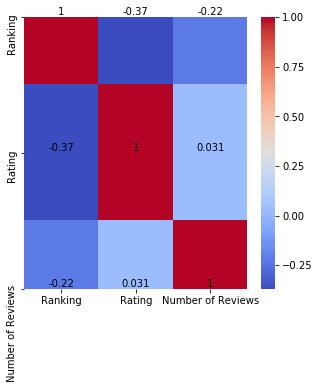

In [18]:
# посмотрим корреляцию в лоб
correlation_workflow(df_train, 0.7, 0.1, 5)

In [19]:
# пока ничего не видно

### Restaurant_id

In [20]:
df_train['Restaurant_id'].value_counts().sort_index()

id_0       15
id_1        9
id_10      14
id_100     12
id_1000    11
           ..
id_999     11
id_9991     1
id_9992     2
id_9994     1
id_9995     2
Name: Restaurant_id, Length: 11909, dtype: int64

In [21]:
vc_sv_rest_id = df_train['Restaurant_id'].value_counts().sort_values()
vc_sv_rest_id

id_8616     1
id_4103     1
id_9790     1
id_6534     1
id_7992     1
           ..
id_534     17
id_227     18
id_436     18
id_633     18
id_871     18
Name: Restaurant_id, Length: 11909, dtype: int64

In [22]:
# как видно строк как пустых ячеек нет, странных значений тоже, кажется всё ок

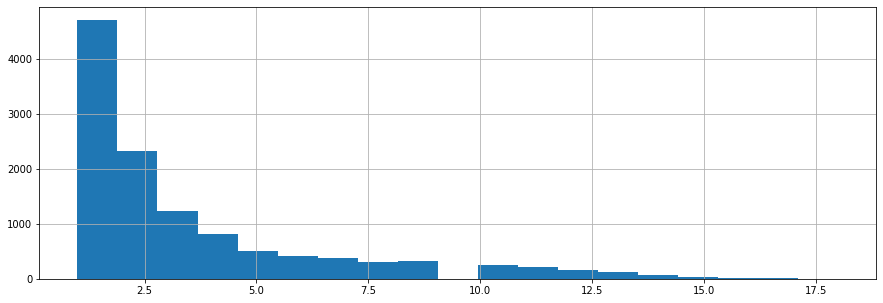

In [23]:
# посмотрим как много много-ресторанных id
df_train['Restaurant_id'].value_counts(dropna=True).hist(bins=19, figsize=(15,5))

In [24]:
# посмотрим что значит одинаковый 'Restaurant_id', возмем пять случайных и посмотрим на их города и кухни
vc_sv_many = vc_sv_rest_id[vc_sv_rest_id > 2].sample(5)
vc_sv_many

id_3049    4
id_3013    3
id_115     7
id_8157    3
id_422     7
Name: Restaurant_id, dtype: int64

In [25]:
for t in range(0, len(vc_sv_many)):
    t_rest =  df_train.loc[df_train['Restaurant_id']==vc_sv_many.index[t]][['Restaurant_id', 'City', 'Cuisine Style']]
    print(t_rest)

      Restaurant_id    City           Cuisine Style
8686        id_3049  Prague    ['Chinese', 'Sushi']
16850       id_3049  Madrid             ['Italian']
24594       id_3049   Paris              ['French']
26628       id_3049    Rome  ['Italian', 'Seafood']
      Restaurant_id    City            Cuisine Style
22889       id_3013   Milan                      NaN
24726       id_3013   Paris  ['Asian', 'Vietnamese']
33497       id_3013  Vienna                      NaN
      Restaurant_id        City  \
1098         id_115  Luxembourg   
1173         id_115      Zurich   
3720         id_115   Stockholm   
11800        id_115     Hamburg   
25844        id_115      Vienna   
26371        id_115      Dublin   
36145        id_115    Helsinki   

                                           Cuisine Style  
1098   ['French', 'European', 'Vegetarian Friendly', ...  
1173   ['German', 'Swiss', 'European', 'Asian', 'Cent...  
3720   ['Indian', 'Vegetarian Friendly', 'Vegan Optio...  
11800      

In [26]:
# как видим - полное разнообразие, 'Restaurant_id' не говорит про сетевой ресторан, подумаем дальше

### City

In [27]:
df_train['City'].value_counts().sort_index()

Amsterdam     1086
Athens         628
Barcelona     2734
Berlin        2155
Bratislava     301
Brussels      1060
Budapest       816
Copenhagen     659
Dublin         673
Edinburgh      596
Geneva         481
Hamburg        949
Helsinki       376
Krakow         443
Lisbon        1300
Ljubljana      183
London        5757
Luxembourg     210
Lyon           892
Madrid        3108
Milan         2133
Munich         893
Oporto         513
Oslo           385
Paris         4897
Prague        1443
Rome          2078
Stockholm      820
Vienna        1166
Warsaw         727
Zurich         538
Name: City, dtype: int64

In [28]:
# тут тоже всё ок

### Ranking

In [29]:
df_train['Ranking'].value_counts().sort_index()

1.0        15
2.0         9
3.0        14
4.0         8
5.0        13
           ..
16420.0     1
16435.0     1
16437.0     1
16441.0     1
16444.0     1
Name: Ranking, Length: 11936, dtype: int64

In [30]:
df_train['Ranking'].value_counts().sort_values()

5699.0      1
10638.0     1
8490.0      1
16381.0     1
14357.0     1
           ..
431.0      18
345.0      18
491.0      18
437.0      18
1080.0     19
Name: Ranking, Length: 11936, dtype: int64

In [31]:
# тут тоже всё ок

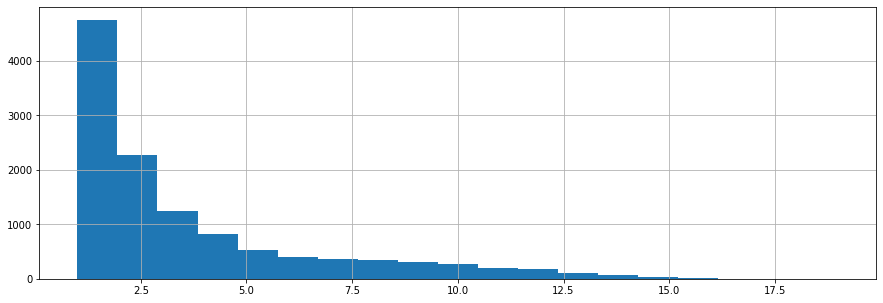

In [32]:
df_train['Ranking'].value_counts(dropna=True).hist(bins=19, figsize=(15,5))

In [33]:
# Очень похоже на Restaurant_Id
df_train[['Restaurant_id', 'Ranking']]

,Restaurant_id,Ranking
0,id_5569,5570.0
1,id_1535,1537.0
2,id_352,353.0
3,id_3456,3458.0
4,id_615,621.0
...,...,...
39995,id_499,500.0
39996,id_6340,6341.0
39997,id_1649,1652.0
39998,id_640,641.0


In [34]:
# Даже так бросается в глаза сходство o_O
# Сделаем номерной признак и подсчитаем корреляцию опять
def rest_id_to_num(rest_id_str):
    parts = rest_id_str.split('_')
    id_num = int(parts[1])
    return id_num

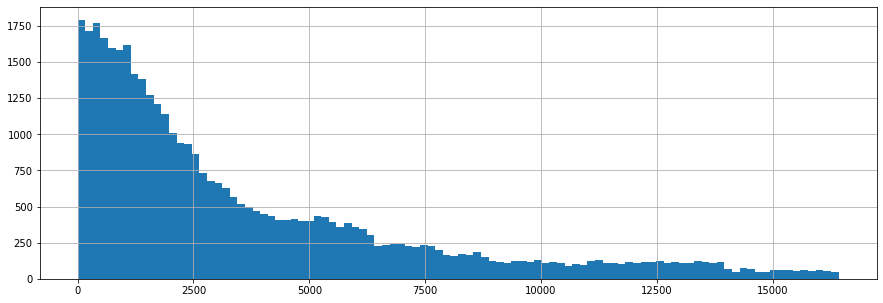

In [35]:
df_train['Restaurant_id_NUM'] = df_train['Restaurant_id'].apply(lambda x: rest_id_to_num(x))
df_train['Restaurant_id_NUM'].hist(bins=100, figsize=(15,5))

                    Ranking    Rating  Number of Reviews  Restaurant_id_NUM
Ranking            1.000000 -0.368371          -0.222670           1.000000
Rating            -0.368371  1.000000           0.030964          -0.368308
Number of Reviews -0.222670  0.030964           1.000000          -0.222637
Restaurant_id_NUM  1.000000 -0.368308          -0.222637           1.000000
---------Correlated---------
Restaurant_id_NUM 	 Ranking 	 0.9999995570800042
---------end--------


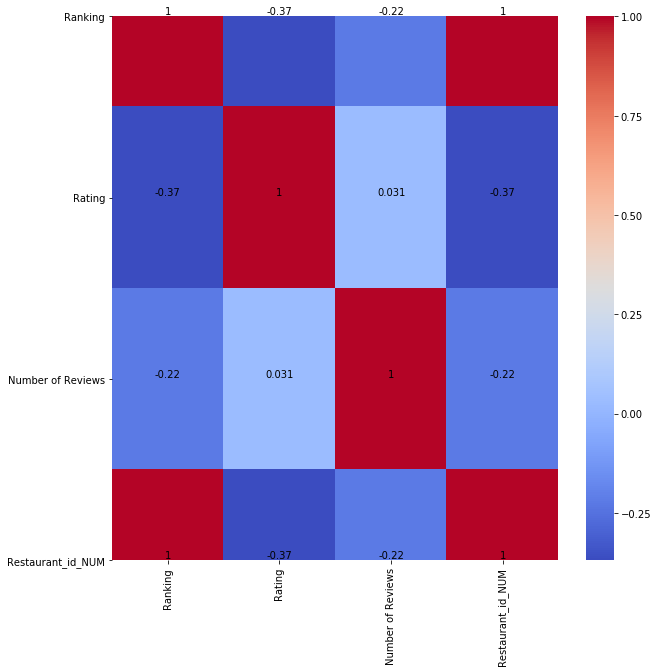

In [36]:
# (запускаю на полном наборе, а не подмножестве т.к. что-то в heatmap c отрисовкой и не видно цветового выделения
# коррелирующих признаков, хотя значения те же
correlation_workflow(df_train, 0.7, 0.1, 10)

In [37]:
# код - если захочется проверить мои слова)
# correlation_workflow(df_train[['Restaurant_id_NUM','Ranking']], 0.7, 0.1, 5)

### как видим - явная корреляция, модели будем отдавать Ranking - он понятен

### URL_TA

In [38]:
vc_sv = df_train['URL_TA'].value_counts().sort_values()
vc_sv

/Restaurant_Review-g189400-d3709131-Reviews-Myrovolos_Metaxourgeio-Athens_Attica.html           1
/Restaurant_Review-g187147-d3457832-Reviews-Paris_Nord_Cafe-Paris_Ile_de_France.html            1
/Restaurant_Review-g187309-d8549016-Reviews-Schlemmermeyer-Munich_Upper_Bavaria_Bavaria.html    1
/Restaurant_Review-g187791-d7908129-Reviews-Cocktail_caffe-Rome_Lazio.html                      1
/Restaurant_Review-g187323-d2718797-Reviews-Asia_Wok-Berlin.html                                1
                                                                                               ..
/Restaurant_Review-g187514-d793170-Reviews-Caripen_Bistro-Madrid.html                           2
/Restaurant_Review-g187514-d11698990-Reviews-Verdello_Restaurante-Madrid.html                   2
/Restaurant_Review-g187514-d7809594-Reviews-La_Guapa-Madrid.html                                2
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html                            2
/Restaurant_Review-g

In [39]:
# дальше странная история, возьмем те которые больше раза встречаются 
vc_sv2 = vc_sv[vc_sv > 1]
vc_sv2

/Restaurant_Review-g187514-d987900-Reviews-Compostela_Restaurante-Madrid.html      2
/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html           2
/Restaurant_Review-g187514-d3161682-Reviews-Cerveceria_La_Surena-Madrid.html       2
/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html                 2
/Restaurant_Review-g187514-d11921719-Reviews-Crepets-Madrid.html                   2
/Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html                2
/Restaurant_Review-g187514-d13002276-Reviews-Delish_Vegan_Doughnuts-Madrid.html    2
/Restaurant_Review-g187514-d3685055-Reviews-Shukran-Madrid.html                    2
/Restaurant_Review-g187514-d11674463-Reviews-Beerhouse-Madrid.html                 2
/Restaurant_Review-g187514-d11999956-Reviews-SugarCane_Madrid-Madrid.html          2
/Restaurant_Review-g187514-d697406-Reviews-Al_Mounia-Madrid.html                   2
/Restaurant_Review-g187514-d7337366-Reviews-Lady_Madonna-Madrid.h

In [40]:
# возьмем случайную строку (здесь можно взять случайный индекс, но для дальнейшей демонстраци проще взять конкретное число)
vc_sv_short = vc_sv2[1:2]
vc_sv_short

/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html    2
Name: URL_TA, dtype: int64

In [50]:
# функция разницы между строками, там где разница пишет значение вида "значение1 Vs значение2"
def print_diffs_2rows(input_subdf, key_col):
    global dfXXX
    has_diffs_global = False
    for i in range(0, len(input_subdf)-1):
        #print(i)
        irow = input_subdf.iloc[i]
        for j in range(i+1, len(input_subdf)):
            #print(j)
            jrow = input_subdf.iloc[j]
            diffrow = irow.copy()
            has_diffs = False
            for nn in input_subdf.columns:
                if (nn == key_col):
                    diffrow[nn] = irow[nn]
                    continue
                    
                if ((pd.isnull(irow[nn]) == True and pd.isnull(irow[nn]) == True) or (irow[nn] == jrow[nn])):
                    diffrow[nn] = irow[nn]
                    #diffrow[nn] = np.nan
                else:
                    has_diffs = True
                    has_diffs_global = True
                    diffrow[nn] = '"' + str(irow[nn]) + '" Vs "' + str(jrow[nn]) + '"'

            if (has_diffs == True):
                dfXXX = dfXXX.append(diffrow)

In [53]:
# функция разницы между всеми строками
def get_diff_all_rows(v_in, df_in, key_col_in):
    global dfXXX
    for t in range(0, len(v_in)):
        #print('v_in.index[t]' , v_in.index[t])
        t_rest =  df_in.loc[df_in[key_col_in]==v_in.index[t]]
        #print(t_rest)
        print_diffs_2rows(t_rest, key_col_in)
    dfXXX = dfXXX.reset_index()
    return dfXXX

In [54]:
# смотрим разницу
dfXXX = pd.DataFrame(columns=df.columns)
#print(dfXXX)
col_name = 'URL_TA'
res = get_diff_all_rows(vc_sv_short, df_train, col_name)
res = res.dropna(axis=1, how='all')
res

,index,Restaurant_id,City,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,Rating,Restaurant_id_NUM
0,147,"""id_4110"" Vs ""id_4104""",Madrid,['Spanish'],"""4112.0"" Vs ""4106.0""",2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226,5.0,"""4110"" Vs ""4104"""


In [55]:
# глянем эти самые id
df.loc[df['Restaurant_id']=='id_3239']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
3239,id_3239,Zurich,['Mexican'],1035.0,NaN,2.0,"[[""It's soo good I've been there sooo many ti....",/Restaurant_Review-g188113-d12839345-Reviews-Z...,d12839345,NaN
13267,id_3239,Prague,"['American', 'Fast Food']",3246.0,$,59.0,"[['You can do better', 'Worst customer service...",/Restaurant_Review-g274707-d4768666-Reviews-KF...,d4768666,3.5
17253,id_3239,Lisbon,"['European', 'Portuguese']",3243.0,NaN,40.0,"[['Unexpected gem', 'Great food!'], ['05/08/20...",/Restaurant_Review-g189158-d1519119-Reviews-Re...,d1519119,4.0
19478,id_3239,Vienna,['Fast Food'],3241.0,$,43.0,"[['Omg', 'Loved the fact we could order bespok...",/Restaurant_Review-g190454-d1997490-Reviews-Mc...,d1997490,3.0
22134,id_3239,Barcelona,"['Cafe', 'Mediterranean', 'European', 'Pizza',...",3240.0,$$ - $$$,64.0,"[['More than good', 'Healthy food'], ['08/16/2...",/Restaurant_Review-g187497-d7205454-Reviews-Me...,d7205454,4.0
23980,id_3239,Madrid,NaN,3241.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,5.0
33217,id_3239,London,"['Fast Food', 'European', 'Portuguese']",3246.0,$$ - $$$,219.0,"[['Always a THUMB up', 'Great chicken from the...",/Restaurant_Review-g186338-d1021861-Reviews-Na...,d1021861,4.0
39500,id_3239,Berlin,"['Japanese', 'Sushi', 'Asian', 'Fusion']",3241.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187323-d12807643-Reviews-O...,d12807643,5.0
49853,id_3239,Paris,NaN,3240.0,NaN,43.0,"[['Deliciousness', 'Romantic and delicious'], ...",/Restaurant_Review-g187147-d10248508-Reviews-J...,d10248508,4.5


In [56]:
df.loc[df['Restaurant_id']=='id_3242']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
3242,id_3242,Barcelona,['Fast Food'],7709.0,NaN,185.0,"[['Bad service and food', 'Ripoff, avoid at al...",/Restaurant_Review-g187497-d1114210-Reviews-La...,d1114210,NaN
18854,id_3242,London,"['Japanese', 'Vegetarian Friendly']",3249.0,$$ - $$$,16.0,"[['Best Ramen I’ve had outside of Japan!', 'Th...",/Restaurant_Review-g186338-d12874584-Reviews-M...,d12874584,5.0
19854,id_3242,Vienna,"['Italian', 'Pizza', 'Grill']",3244.0,$$ - $$$,6.0,[['A place to enjoy eating any time of the da....,/Restaurant_Review-g190454-d6827920-Reviews-De...,d6827920,3.0
22465,id_3242,Prague,"['Czech', 'Bar', 'European']",3249.0,$$ - $$$,30.0,"[['Not worth it', 'Eating Good With the locals...",/Restaurant_Review-g274707-d3598472-Reviews-U_...,d3598472,4.0
35798,id_3242,Berlin,NaN,3244.0,NaN,3.0,"[['Friendly and quirky bar', 'POSH Teckel'], [...",/Restaurant_Review-g187323-d7251843-Reviews-Po...,d7251843,5.0
43832,id_3242,Lisbon,NaN,3246.0,NaN,10.0,"[['Alright', 'Pao de Deus is my new favorite']...",/Restaurant_Review-g189158-d10248474-Reviews-P...,d10248474,3.5
48946,id_3242,Madrid,NaN,3244.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,5.0


##### Неясность Restaurant_id была обсуждена выше, тут по-прежнему непонятно. Так как строки явно дублируются, возможно это просто какие-то ошибки обновления БД...

### ID_TA

In [435]:
df_train['ID_TA'].value_counts().sort_values()

d719802      1
d10230697    1
d12322365    1
d1872794     1
d1037204     1
            ..
d11698990    2
d697406      2
d4600226     2
d11921719    2
d10047799    2
Name: ID_TA, Length: 39980, dtype: int64

In [ ]:
# тут тоже всё ок

### Cuisine

In [408]:
all_cuisine_types = collections.Counter()

In [417]:
def get_cuisines(row_next):
    global all_cuisine_types
    if (pd.isnull(row_next['Cuisine Style'])==True):
        return 0
    next_cuisines = row_next['Cuisine Style'][1:-1].replace("'","").replace(", ",",").split(',') # replace("'","").replace(", ",",")
    for nc in next_cuisines:
        all_cuisine_types[nc] += 1
    return len(next_cuisines)

In [418]:
def check_cuisine_nan(row_next):
    if (row_next['cuisine_count'] == 0):
        return 1
    return 0

In [419]:
all_cuisine_types = collections.Counter()
# выключаем предупреждение - здесь создаем колонку, никаких chained-операций
pd.options.mode.chained_assignment = None
# делаем новую колонку - массив директоров, а не строку
df_train['cuisine_count'] = df_train.apply(
    (lambda row: get_cuisines(row)), axis=1)
df_train['cuisine_nan'] = df_train.apply(
    (lambda row: check_cuisine_nan(row)), axis=1)
pd.options.mode.chained_assignment = 'warn'

In [421]:
len(all_cuisine_types), sum(all_cuisine_types.values()), sorted(all_cuisine_types)

(115,
 24063,
 ['Afghani',
  'African',
  'American',
  'Arabic',
  'Argentinean',
  'Armenian',
  'Asian',
  'Australian',
  'Austrian',
  'Azerbaijani',
  'Balti',
  'Bangladeshi',
  'Bar',
  'Barbecue',
  'Belgian',
  'Brazilian',
  'Brew Pub',
  'British',
  'Cafe',
  'Cajun & Creole',
  'Cambodian',
  'Canadian',
  'Caribbean',
  'Central American',
  'Central European',
  'Chilean',
  'Chinese',
  'Colombian',
  'Contemporary',
  'Croatian',
  'Cuban',
  'Czech',
  'Danish',
  'Delicatessen',
  'Diner',
  'Dutch',
  'Eastern European',
  'Ecuadorean',
  'Egyptian',
  'Ethiopian',
  'European',
  'Fast Food',
  'Filipino',
  'French',
  'Fusion',
  'Gastropub',
  'Georgian',
  'German',
  'Gluten Free Options',
  'Greek',
  'Grill',
  'Halal',
  'Hawaiian',
  'Healthy',
  'Hungarian',
  'Indian',
  'Indonesian',
  'International',
  'Irish',
  'Israeli',
  'Italian',
  'Jamaican',
  'Japanese',
  'Korean',
  'Kosher',
  'Latin',
  'Lebanese',
  'Malaysian',
  'Mediterranean',
  'M

In [437]:
vc_sv2 = vc_sv[vc_sv > 1]
vc_sv2

/Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html                2
/Restaurant_Review-g187514-d10047799-Reviews-Entrepuntos-Madrid.html               2
/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html           2
/Restaurant_Review-g187514-d7337366-Reviews-Lady_Madonna-Madrid.html               2
/Restaurant_Review-g187514-d11921719-Reviews-Crepets-Madrid.html                   2
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html               2
/Restaurant_Review-g187514-d7809594-Reviews-La_Guapa-Madrid.html                   2
/Restaurant_Review-g187514-d987900-Reviews-Compostela_Restaurante-Madrid.html      2
/Restaurant_Review-g187514-d13002276-Reviews-Delish_Vegan_Doughnuts-Madrid.html    2
/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html          2
/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html                 2
/Restaurant_Review-g187514-d3161682-Reviews-Cerveceria_La_Surena-

In [461]:
vc_sv_short = vc_sv2[12:13]
vc_sv_short
vc_sv_short = vc_sv2[1:2]
vc_sv_short

/Restaurant_Review-g187514-d10047799-Reviews-Entrepuntos-Madrid.html    2
Name: URL_TA, dtype: int64

In [439]:
vc_sv_short.index[0]

'/Restaurant_Review-g187514-d697406-Reviews-Al_Mounia-Madrid.html'

In [440]:
dfXXX = pd.DataFrame(columns=df.columns)

In [448]:
def print_changes(input_subdf):
    #dfXXX = pd.DataFrame(columns=df.columns)    
    global dfXXX
    has_diffs_global = False
    for i in range(0, len(input_subdf)-1):
        #print(i)
        irow = input_subdf.iloc[i]
        for j in range(i+1, len(input_subdf)):
            #print(j)
            jrow = input_subdf.iloc[j]
            diffrow = irow.copy()
            has_diffs = False
            for nn in input_subdf.columns:
                if (nn == 'URL_TA'):
                    diffrow[nn] = irow[nn]
                    continue
                    #if ((pd.isnull(irow[nn]) == True and pd.isnull(irow[nn]) == True) or (irow[nn] == jrow[nn])):
                    #    #diffrow[nn] = irow[nn]
                    #    diffrow[nn] = np.nan
                    #else:
                    #    has_diffs = True
                    #    has_diffs_global = True
                    #    diffrow[nn] = '"' + str(irow[nn]) + '" Vs "' + str(jrow[nn]) + '"'
                    #continue
                if ((pd.isnull(irow[nn]) == True and pd.isnull(irow[nn]) == True) or (irow[nn] == jrow[nn])):
                    diffrow[nn] = irow[nn]
                    #diffrow[nn] = np.nan
                else:
                    has_diffs = True
                    has_diffs_global = True
                    diffrow[nn] = '"' + str(irow[nn]) + '" Vs "' + str(jrow[nn]) + '"'

            if (has_diffs == True):
                dfXXX = dfXXX.append(diffrow)
            #print(diffrow)
    #if (has_diffs_global == True):
    #    dfXXX = dfXXX.reset_index()
    #    print(dfXXX)

In [451]:
def get_diff(v_in):
    global dfXXX
    for t in range(0, len(v_in)):
        #print('v_in.index[t]' , v_in.index[t])
        t_rest =  df.loc[df['URL_TA']==v_in.index[t]]
        print(t_rest)
        print_changes(t_rest)
    dfXXX = dfXXX.reset_index()
    return dfXXX

In [457]:
dfXXX = pd.DataFrame(columns=df.columns)
print(dfXXX)
res = get_diff(vc_sv_short)
#res = get_diff(vc_sv2)
res = res.dropna(axis=1, how='all')
res

Empty DataFrame
Columns: [Restaurant_id, City, Cuisine Style, Ranking, Price Range, Number of Reviews, Reviews, URL_TA, ID_TA, Rating]
Index: []
      Restaurant_id    City Cuisine Style  Ranking Price Range  \
23980       id_3239  Madrid           NaN   3241.0         NaN   
48946       id_3242  Madrid           NaN   3244.0         NaN   

       Number of Reviews   Reviews  \
23980               13.0  [[], []]   
48946               13.0  [[], []]   

                                                  URL_TA      ID_TA  Rating  
23980  /Restaurant_Review-g187514-d10047799-Reviews-E...  d10047799     5.0  
48946  /Restaurant_Review-g187514-d10047799-Reviews-E...  d10047799     5.0  


,index,Restaurant_id,City,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
0,23980,"""id_3239"" Vs ""id_3242""",Madrid,"""3241.0"" Vs ""3244.0""",13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,5.0


In [453]:
df.loc[df['Restaurant_id']=='id_1180']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
1180,id_1180,Amsterdam,['Chinese'],1826.0,$,13.0,"[['Nice Chinese food', 'Great Wok, home style!...",/Restaurant_Review-g188590-d4063578-Reviews-Wo...,d4063578,NaN
14578,id_1180,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1181.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406,4.0
25708,id_1180,Budapest,"['Italian', 'International', 'European', 'Hung...",1181.0,$$ - $$$,2.0,"[['Great stop off by the river'], ['01/01/2018']]",/Restaurant_Review-g274887-d12993963-Reviews-P...,d12993963,5.0
42142,id_1180,Lyon,['Pizza'],1180.0,$$ - $$$,5.0,"[[], []]",/Restaurant_Review-g187265-d11656254-Reviews-P...,d11656254,5.0
43030,id_1180,Warsaw,['Italian'],1181.0,$$ - $$$,7.0,"[['Great pizza', 'Average but expensive pizza'...",/Restaurant_Review-g274856-d12959565-Reviews-I...,d12959565,4.0
45423,id_1180,Munich,"['American', 'Vegetarian Friendly']",1191.0,$$ - $$$,118.0,[['Fantastic bio burger! Definitely need to c....,/Restaurant_Review-g187309-d6895782-Reviews-Ho...,d6895782,4.0


In [454]:
df.loc[df['Restaurant_id']=='id_1209']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
1209,id_1209,Barcelona,['Cafe'],7401.0,$,2.0,"[['Go somewhere else', 'Delicious!'], ['01/09/...",/Restaurant_Review-g187497-d10664301-Reviews-P...,d10664301,NaN
13099,id_1209,Edinburgh,['Indian'],1210.0,$$ - $$$,2.0,"[['good Indian food', 'good Indian curry in Ed...",/Restaurant_Review-g186525-d11778986-Reviews-S...,d11778986,5.0
22480,id_1209,Athens,NaN,1211.0,NaN,4.0,"[[], []]",/Restaurant_Review-g189400-d11747446-Reviews-C...,d11747446,4.5
38096,id_1209,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1210.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406,4.0
41955,id_1209,Munich,NaN,1221.0,NaN,16.0,"[['Bavarian Theme Dinner', 'Nice hotel with go...",/Restaurant_Review-g187309-d4131064-Reviews-Hi...,d4131064,4.0


In [458]:
df.loc[df['Restaurant_id']=='id_3239']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
3239,id_3239,Zurich,['Mexican'],1035.0,NaN,2.0,"[[""It's soo good I've been there sooo many ti....",/Restaurant_Review-g188113-d12839345-Reviews-Z...,d12839345,NaN
13267,id_3239,Prague,"['American', 'Fast Food']",3246.0,$,59.0,"[['You can do better', 'Worst customer service...",/Restaurant_Review-g274707-d4768666-Reviews-KF...,d4768666,3.5
17253,id_3239,Lisbon,"['European', 'Portuguese']",3243.0,NaN,40.0,"[['Unexpected gem', 'Great food!'], ['05/08/20...",/Restaurant_Review-g189158-d1519119-Reviews-Re...,d1519119,4.0
19478,id_3239,Vienna,['Fast Food'],3241.0,$,43.0,"[['Omg', 'Loved the fact we could order bespok...",/Restaurant_Review-g190454-d1997490-Reviews-Mc...,d1997490,3.0
22134,id_3239,Barcelona,"['Cafe', 'Mediterranean', 'European', 'Pizza',...",3240.0,$$ - $$$,64.0,"[['More than good', 'Healthy food'], ['08/16/2...",/Restaurant_Review-g187497-d7205454-Reviews-Me...,d7205454,4.0
23980,id_3239,Madrid,NaN,3241.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,5.0
33217,id_3239,London,"['Fast Food', 'European', 'Portuguese']",3246.0,$$ - $$$,219.0,"[['Always a THUMB up', 'Great chicken from the...",/Restaurant_Review-g186338-d1021861-Reviews-Na...,d1021861,4.0
39500,id_3239,Berlin,"['Japanese', 'Sushi', 'Asian', 'Fusion']",3241.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187323-d12807643-Reviews-O...,d12807643,5.0
49853,id_3239,Paris,NaN,3240.0,NaN,43.0,"[['Deliciousness', 'Romantic and delicious'], ...",/Restaurant_Review-g187147-d10248508-Reviews-J...,d10248508,4.5


In [459]:
df.loc[df['Restaurant_id']=='id_3242']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
3242,id_3242,Barcelona,['Fast Food'],7709.0,NaN,185.0,"[['Bad service and food', 'Ripoff, avoid at al...",/Restaurant_Review-g187497-d1114210-Reviews-La...,d1114210,NaN
18854,id_3242,London,"['Japanese', 'Vegetarian Friendly']",3249.0,$$ - $$$,16.0,"[['Best Ramen I’ve had outside of Japan!', 'Th...",/Restaurant_Review-g186338-d12874584-Reviews-M...,d12874584,5.0
19854,id_3242,Vienna,"['Italian', 'Pizza', 'Grill']",3244.0,$$ - $$$,6.0,[['A place to enjoy eating any time of the da....,/Restaurant_Review-g190454-d6827920-Reviews-De...,d6827920,3.0
22465,id_3242,Prague,"['Czech', 'Bar', 'European']",3249.0,$$ - $$$,30.0,"[['Not worth it', 'Eating Good With the locals...",/Restaurant_Review-g274707-d3598472-Reviews-U_...,d3598472,4.0
35798,id_3242,Berlin,NaN,3244.0,NaN,3.0,"[['Friendly and quirky bar', 'POSH Teckel'], [...",/Restaurant_Review-g187323-d7251843-Reviews-Po...,d7251843,5.0
43832,id_3242,Lisbon,NaN,3246.0,NaN,10.0,"[['Alright', 'Pao de Deus is my new favorite']...",/Restaurant_Review-g189158-d10248474-Reviews-P...,d10248474,3.5
48946,id_3242,Madrid,NaN,3244.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,5.0


In [45]:
df['Restaurant_id'].value_counts(dropna=True)

id_871      19
id_227      19
id_633      19
id_436      19
id_430      18
            ..
id_14292     1
id_13443     1
id_8595      1
id_8409      1
id_9215      1
Name: Restaurant_id, Length: 13094, dtype: int64

In [ ]:
dfXXX = pd.DataFrame(columns=df.columns)

traku =  df.loc[df['URL_TA']=='/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html']

for i in range(0, len(traku_c)-1):
    #print(i)
    irow = traku_c.iloc[i]
    for j in range(i+1, len(traku_c)):
        #print(j)
        jrow = traku_c.iloc[j]
        diffrow = irow.copy()
        for nn in traku_c.columns:
            if (irow[nn] != jrow[nn]):
                diffrow[nn] = str(irow[nn]) + ' XXX ' + str(jrow[nn])
            else:
                diffrow[nn] = ""
        
        dfXXX = dfXXX.append(diffrow)
        #print(diffrow)
dfXXX = dfXXX.reset_index()
print(dfXXX)

In [274]:
vc_sv.loc['/Restaurant_Review-g187514-d11698990-Reviews-Verdello_Restaurante-Madrid.html']

2

In [273]:
sub_df_by_url = df[vc_sv.loc[df['URL_TA']]>1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

In [59]:
tt = df['Restaurant_id'].value_counts(dropna=True)

In [80]:
type(tt), tt.loc['id_871'], tt[tt.index == 'id_871'],tt[tt == 19]

(pandas.core.series.Series, 19, id_871    19
 Name: Restaurant_id, dtype: int64, id_871    19
 id_227    19
 id_633    19
 id_436    19
 Name: Restaurant_id, dtype: int64)

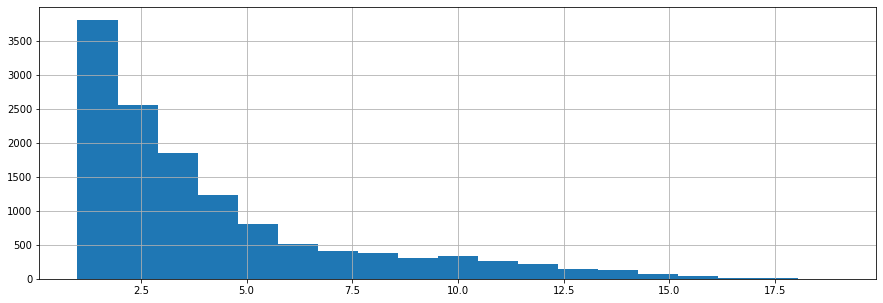

In [65]:
df['Restaurant_id'].value_counts(dropna=True).hist(bins=19, figsize=(15,5))

In [81]:
tt.median(), tt.mean()

(3.0, 3.81854284405071)

In [82]:
tt.describe()

count    13094.000000
mean         3.818543
std          3.379358
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         19.000000
Name: Restaurant_id, dtype: float64

In [73]:
yy = tt.value_counts()
yy

1     3807
2     2555
3     1845
4     1226
5      812
6      514
7      413
8      384
10     332
9      311
11     255
12     221
13     151
14     129
15      74
16      37
17      18
18       6
19       4
Name: Restaurant_id, dtype: int64

In [46]:
df['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [47]:
df['Price Range'].value_counts(dropna=True)

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [48]:
df['Price Range'].value_counts(dropna=False).sum()

50000

In [49]:
df['Price Range'].value_counts(dropna=True).sum()

32639

In [83]:
df['URL_TA'].value_counts(dropna=True)

/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html                        2
/Restaurant_Review-g187514-d13002276-Reviews-Delish_Vegan_Doughnuts-Madrid.html           2
/Restaurant_Review-g187514-d1568045-Reviews-Restaurante_Lateral_Santa_Ana-Madrid.html     2
/Restaurant_Review-g187514-d7827387-Reviews-El_Gusto_Es_Nuestro-Madrid.html               2
/Restaurant_Review-g187514-d3647024-Reviews-La_Zamorana-Madrid.html                       2
                                                                                         ..
/Restaurant_Review-g187147-d12438151-Reviews-A_Mia-Paris_Ile_de_France.html               1
/Restaurant_Review-g187147-d3578267-Reviews-L_Apesanteur-Paris_Ile_de_France.html         1
/Restaurant_Review-g187323-d13076814-Reviews-La_Vong-Berlin.html                          1
/Restaurant_Review-g186338-d2014574-Reviews-Zizzi_Central_St_Giles-London_England.html    1
/Restaurant_Review-g187323-d12477034-Reviews-Endorphina_Backkunst-Berlin.html   

In [84]:
df['URL_TA'].value_counts(dropna=False)

/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html                        2
/Restaurant_Review-g187514-d13002276-Reviews-Delish_Vegan_Doughnuts-Madrid.html           2
/Restaurant_Review-g187514-d1568045-Reviews-Restaurante_Lateral_Santa_Ana-Madrid.html     2
/Restaurant_Review-g187514-d7827387-Reviews-El_Gusto_Es_Nuestro-Madrid.html               2
/Restaurant_Review-g187514-d3647024-Reviews-La_Zamorana-Madrid.html                       2
                                                                                         ..
/Restaurant_Review-g187147-d12438151-Reviews-A_Mia-Paris_Ile_de_France.html               1
/Restaurant_Review-g187147-d3578267-Reviews-L_Apesanteur-Paris_Ile_de_France.html         1
/Restaurant_Review-g187323-d13076814-Reviews-La_Vong-Berlin.html                          1
/Restaurant_Review-g186338-d2014574-Reviews-Zizzi_Central_St_Giles-London_England.html    1
/Restaurant_Review-g187323-d12477034-Reviews-Endorphina_Backkunst-Berlin.html   

In [119]:
df['URL_TA'].value_counts(dropna=False).sum()

50000

In [108]:
traku =  df.loc[df['URL_TA']=='/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html']
traku

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
25295,id_475,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,4.5
25565,id_530,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,4.5


In [109]:
traku.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 25295 to 25565
Data columns (total 10 columns):
Restaurant_id        2 non-null object
City                 2 non-null object
Cuisine Style        2 non-null object
Ranking              2 non-null float64
Price Range          2 non-null object
Number of Reviews    2 non-null float64
Reviews              2 non-null object
URL_TA               2 non-null object
ID_TA                2 non-null object
Rating               2 non-null float64
dtypes: float64(3), object(7)
memory usage: 176.0+ bytes


In [110]:
traku_c = traku.copy()

In [111]:
len(traku_c.iloc[0])

10

In [112]:
traku_c.iloc[0]['URL_TA']

'/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html'

In [113]:
len(traku_c)

2

In [118]:
dfXXX = pd.DataFrame(columns=traku_c.columns)

for i in range(0, len(traku_c)-1):
    #print(i)
    irow = traku_c.iloc[i]
    for j in range(i+1, len(traku_c)):
        #print(j)
        jrow = traku_c.iloc[j]
        diffrow = irow.copy()
        for nn in traku_c.columns:
            if (irow[nn] != jrow[nn]):
                diffrow[nn] = str(irow[nn]) + ' XXX ' + str(jrow[nn])
            else:
                diffrow[nn] = ""
        
        dfXXX = dfXXX.append(diffrow)
        #print(diffrow)
dfXXX = dfXXX.reset_index()
print(dfXXX)

   index      Restaurant_id City Cuisine Style          Ranking Price Range  \
0  25295  id_475 XXX id_530                     476.0 XXX 531.0               

  Number of Reviews Reviews URL_TA ID_TA Rating  
0                                                


In [116]:
dfXXX

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
25295,id_475 XXX id_530,,,476.0 XXX 531.0,,,,,,


In [194]:
test_part = df[:3].copy()

In [197]:
test_part = df[df['Restaurant_id'] == 'id_1130'].copy()

In [198]:
test_part

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Rating
1130,id_1130,Rome,NaN,5863.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187791-d8339185-Reviews-Sa...,d8339185,NaN
11553,id_1130,Krakow,['International'],1131.0,$$ - $$$,19.0,"[['Good stop off in Summer', 'Late night party...",/Restaurant_Review-g274772-d6715484-Reviews-Pl...,d6715484,3.5
12108,id_1130,Paris,"['French', 'European', 'Wine Bar', 'Vegetarian...",1131.0,$$$$,265.0,[['they accommodated a vegan meal without war....,/Restaurant_Review-g187147-d2500555-Reviews-Al...,d2500555,4.5
12602,id_1130,Warsaw,NaN,1132.0,NaN,NaN,"[['1930'], ['12/14/2017']]",/Restaurant_Review-g274856-d13125943-Reviews-D...,d13125943,5.0
13914,id_1130,Lisbon,"['European', 'Portuguese', 'Bar', 'Cafe', 'Veg...",1131.0,$$ - $$$,65.0,"[['Great hamburgers!', 'Wonderful burger!'], [...",/Restaurant_Review-g189158-d3512851-Reviews-En...,d3512851,4.5
25494,id_1130,Edinburgh,NaN,1131.0,NaN,12.0,"[['Delicious deli', 'Yummy'], ['09/27/2017', '...",/Restaurant_Review-g186525-d1316243-Reviews-He...,d1316243,4.5
28211,id_1130,Barcelona,"['French', 'Spanish', 'Fusion', 'Croatian', 'V...",1131.0,$$ - $$$,91.0,"[['Excellent food and great service', 'A Gem']...",/Restaurant_Review-g187497-d6610761-Reviews-Ro...,d6610761,5.0
36645,id_1130,Oporto,"['European', 'Portuguese']",1131.0,$$ - $$$,23.0,"[['Yummy', 'Very pleasant evening'], ['03/23/2...",/Restaurant_Review-g189180-d11960911-Reviews-R...,d11960911,3.5
47064,id_1130,Rome,"['Italian', 'Bar', 'Fast Food', 'Pub', 'Vegeta...",1131.0,$,111.0,"[['Simple, tasty', 'Great street food'], ['12/...",/Restaurant_Review-g187791-d11909188-Reviews-B...,d11909188,4.5


In [158]:
all_words = set()

In [202]:
def fmt_str_test(input_str):
    global all_words
    #print(type(input_str))
    #input_str = input_row['Reviews']
    #clean_view = str(input_str).replace("[","").replace("]","").replace(", ",",").replace("'","")
    #print(input_str)
    half_view = input_str.split('], [')
    
    if (len(half_view) != 2):
        print('half_view', len(half_view), half_view) 
        return (False, )
    
    #print('half_view', half_view[0])
    
    #sec_part = half_view[0].replace("[","").replace("]","").replace(","," ").replace("  "," ").split(' ')
    
    #txt = "Hello Sam!"
    mytable = half_view[0].maketrans("", "", string.punctuation)
    #print(txt.translate(mytable))

    translated = half_view[0].translate(mytable)
    sec_part = translated.split(' ')
    
    
    #if (len(sec_part) != 2):
    #print('sec_part', len(sec_part), sec_part) 
        #return
        
    finn = set([sstr for sstr in sec_part if (len(sstr)>3 and not any(elem in sstr for elem in "1234567890"))])
    #print('finn', len(finn), finn)
    #print('all_words', len(all_words), all_words)
    all_words.update(finn)

    return (True, finn)

In [175]:
def fmt_rev(input_row):
    #print(type(input_str))
    input_str = input_row['Reviews']
    if (pd.isnull(input_str)==True):
        return "bad"
    res = fmt_str_test(input_str)
    if (res[0] == True):
        return "good"
    
    return "bad"

In [204]:
df_w = df.copy()

In [205]:
def get_words(df_to):
    pd.options.mode.chained_assignment = None
    # делаем новую колонку - массив директоров, а не строку
    df_to.apply((lambda row: fmt_rev(row)), axis=1)
    # включаем предупреждение обратно
    pd.options.mode.chained_assignment ='warn'

In [206]:
all_words = set()
get_words(df_w)
all_words = sorted(all_words)
print(type(all_words), len(all_words))
#all_words

<class 'list'> 19078


In [207]:
with open("words.txt", "w", encoding="utf-8") as write_file:
    for t in all_words:
        write_file.write(t+'\n')

In [169]:
df_w.iloc[8168]

Restaurant_id                                                  id_8168
City                                                            Lisbon
Cuisine Style                                                      NaN
Ranking                                                           3389
Price Range                                                        NaN
Number of Reviews                                                    2
Reviews                                                            NaN
URL_TA               /Restaurant_Review-g189158-d12683988-Reviews-O...
ID_TA                                                        d12683988
Rating                                                             NaN
Name: 8168, dtype: object

In [203]:
all_words = set()
# выключаем предупреждение - здесь создаем колонку, никаких chained-операций
pd.options.mode.chained_assignment = None
# делаем новую колонку - массив директоров, а не строку
test_part['arr'] = test_part.apply(
    (lambda row: fmt_rev(row)), axis=1)
# включаем предупреждение обратно
pd.options.mode.chained_assignment ='warn'
# размножаем/дублируем строки так, чтобы в каждой строке был один режиссер
#df_cuis_copy_nn_exploded = df_cuis_copy_nn.explode('cuisine')
#test_part
all_words = sorted(all_words)
all_words

['Delicious',
 'Excellent',
 'Food',
 'Good',
 'Great',
 'Late',
 'ServiceGreat',
 'Simple',
 'Summer',
 'Very',
 'Wonderful',
 'Yummy',
 'accommodated',
 'burger',
 'deli',
 'evening',
 'food',
 'great',
 'hamburgers',
 'meal',
 'night',
 'party',
 'pleasant',
 'service',
 'stop',
 'street',
 'tasty',
 'they',
 'vegan',
 'without']

In [217]:
dict_df = pd.read_csv('subjclueslen.csv',  delimiter=';')

In [219]:
dict_df = dict_df.drop(['trash'], axis=1)
dict_df

,type,word,polarity
0,weak,abandoned,negative
1,weak,abandonment,negative
2,weak,abandon,negative
3,strong,abase,negative
4,strong,abasement,negative
...,...,...,...
8217,strong,zealot,negative
8218,strong,zealous,negative
8219,strong,zealously,negative
8220,strong,zenith,positive


In [221]:
dict_df['word'].nunique(), dict_df['word'].unique()

(6886,
 array(['abandoned', 'abandonment', 'abandon', ..., 'zealously', 'zenith',
        'zest'], dtype=object))

In [222]:
pp = dict_df['word'].value_counts()
pp

welcome        4
trouble        4
savage         3
autocratic     3
protest        3
              ..
dignity        1
romanticize    1
heresy         1
unorthodox     1
elatedly       1
Name: word, Length: 6886, dtype: int64

In [223]:
pp2 = pp[pp > 1]

In [227]:
pp2.index[2]

'savage'

In [228]:
pp3 = pp2[:4]

In [229]:
pp3

welcome       4
trouble       4
savage        3
autocratic    3
Name: word, dtype: int64

In [248]:
def check_d(pps, printb=False):
    for ind in pp3.index:
        if (printb==True):
            print(ind)
        this_word = dict_df[dict_df['word']==ind]
        if (printb==True):
            print(this_word)
        polart = this_word['polarity'].value_counts()
        if (len(polart) != 1):
            if (printb==True):
                print("alert", polart, len(polart), polart.index[0])
            print("alert", polart, len(polart), polart.index[0])
        else:
            if (printb==True):
                print("good", polart.index[0])
        strength = this_word['type'].value_counts()
        if (len(strength) != 1):
            if (printb==True):
                print("diff", strength, len(strength))
        else:
            if (printb==True):
                print("good", strength.index[0])

In [256]:
def check_d2(pps, printb=False):
    global dict_df2_clean
    for ind in pp3.index:
        if (printb==True):
            print(ind)
        this_word = dict_df[dict_df['word']==ind]
        if (printb==True):
            print(this_word)
        polart = this_word['polarity'].value_counts()
        if (len(polart) != 1):
            if (printb==True):
                print("alert", polart, len(polart), polart.index[0])
            print("alert", polart, len(polart), polart.index[0])
        else:
            if (printb==True):
                print("good", polart.index[0])
            dict_df2_clean[dict_df2_clean['word']==ind]['polarity']=polart.index[0]
        strength = this_word['type'].value_counts()
        if (len(strength) != 1):
            if (printb==True):
                print("diff", strength, len(strength))
            dict_df2_clean[dict_df2_clean['word']==ind]['type']=strength.index[0]
        else:
            if (printb==True):
                print("good", strength.index[0])
            dict_df2_clean[dict_df2_clean['word']==ind]['polarity']=polart.index[0]

In [249]:
check_d(pp3, False)

In [250]:
check_d(pp2, False)

In [251]:
dict_df2 = dict_df.copy()

In [255]:
dict_df2_clean = dict_df2.drop_duplicates(['word'])

In [258]:
pd.options.mode.chained_assignment = None
check_d2(pp2, False)
pd.options.mode.chained_assignment = 'warn'

In [259]:
tst = dict_df2_clean[dict_df2_clean['word']=='welcome'].copy()

In [260]:
tst

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive


In [261]:
dict_df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 0 to 8221
Data columns (total 4 columns):
type        6886 non-null object
word        6886 non-null object
trash       6886 non-null object
polarity    6886 non-null object
dtypes: object(4)
memory usage: 269.0+ KB


In [253]:
this_xxword = dict_df[dict_df['word']=='welcome'].copy()
this_xxword

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive
8061,weak,welcome,anypos stemmed1=y,positive
8062,strong,welcome,noun stemmed1=n,positive
8063,strong,welcome,verb stemmed1=y,positive


In [254]:
this_xxword_c = this_xxword.drop_duplicates(['word'])
this_xxword_c

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive


In [224]:
pp2

welcome       4
trouble       4
savage        3
autocratic    3
protest       3
             ..
coupists      2
eyebrows      2
humanists     2
defrauding    2
spiritual     2
Name: word, Length: 1254, dtype: int64

In [216]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 4 columns):
type        8222 non-null object
word        8222 non-null object
trash       8222 non-null object
polarity    8222 non-null object
dtypes: object(4)
memory usage: 257.1+ KB


In [214]:
dict_df.sample(5)

,0,1,2,3
947,strong,brutish,adj stemmed1=n,negative
6619,weak,shake,verb stemmed1=y,negative
2799,weak,fast-paced,adj stemmed1=n,positive
5449,strong,partisans,noun stemmed1=n,negative
957,strong,bully,adj stemmed1=n,negative
